In [77]:
import numpy as np
import scipy.stats
import timeit
import matplotlib.pyplot as plt

In [78]:
def sample_normal_twelve(mu,sigma):
  # Formula returns sample from normal distribution with mean=0
  x=0.5*np.sum(np.random.uniform(-sigma,sigma,12))
  return mu+x

In [109]:
def sample_normal_rejection(mu,sigma):
  # Length of interval from which samples are drawn
  interval = 5*sigma
  # Max value of the pdf of the desired normal distribution
  max_density = scipy.stats.norm(mu,sigma).pdf(mu)

  # np.random.uniform samples (one or many given on the size) from the uniform
  # distribution, whereas the scipy.stats.norm gives a normal continuous
  # random variable and the random variables are uniformly distributed
  while True:
    x = np.random.uniform(mu-interval,mu+interval,1)
    y = np.random.uniform(0,max_density,1)
    if y<scipy.stats.norm(mu,sigma).pdf(x):
      break

  #print(x)
  return x[0]

In [80]:
def sample_normal_boxmuller(mu,sigma):
  # Getting two samples from uniform distribution
  u=np.random.uniform(0,1,2)
  # Box Muller formula using standard normal distribution
  x=np.cos(2*np.pi*u[0])*np.sqrt(-2*np.log(u[1]))
  return mu+sigma*x

In [81]:
def evaluate_sampling_time(mu,sigma,n_samples,sample_function):
  start_t = timeit.default_timer()
  for i in range(n_samples):
    sample_function(mu,sigma)
  end_t = timeit.default_timer()
  time_per_sample=(end_t-start_t)/n_samples * 1e6
  print("%30s : %.3f us" % (sample_function.__name__, time_per_sample))

In [113]:
def evaluate_sampling_distriutions(mu,sigma,n_samples,sample_function):
  n_bins = 100
  samples=[]
  for i in range(n_samples):
    samples.append(sample_function(mu,sigma))
  #print(samples)
  print("%30s : mean = %.3f, std_dev = %.3f" % (sample_function.__name__,np.mean(samples),np.std(samples)))
  plt.figure()
  count, bins, patches = plt.hist(samples,n_bins,density=True)
  plt.plot(bins,scipy.stats.norm(mu,sigma).pdf(bins),lineWidth=2,color='r')
  plt.xlim([mu - 5*sigma, mu + 5*sigma])
  plt.title(sample_function.__name__)

In [114]:
def main():
  mu,sigma=0,1
  sample_functions = [
    sample_normal_twelve,
    sample_normal_rejection,
    sample_normal_boxmuller,
    np.random.normal
  ]
  print(sample_functions)

  for func in sample_functions:
    evaluate_sampling_time(mu,sigma,1000,func)
  
  n_samples = 10000
  print("evaluting sample distances with:" ) 
  print(" mean :", mu)
  print(" std_dev :", sigma)
  print(" samples :", n_samples)
  for fnc in sample_functions: 
    evaluate_sampling_distriutions(mu, sigma, n_samples, fnc)
  
  plt.show()

[<function sample_normal_twelve at 0x7f9b69d44d40>, <function sample_normal_rejection at 0x7f9b6a150b90>, <function sample_normal_boxmuller at 0x7f9b6aedf7a0>, <built-in method normal of numpy.random.mtrand.RandomState object at 0x7f9b8f7f2050>]
          sample_normal_twelve : 21.932 us
       sample_normal_rejection : 4606.306 us
       sample_normal_boxmuller : 10.400 us
                        normal : 2.953 us
evaluting sample distances with:
 mean : 0
 std_dev : 1
 samples : 10000
          sample_normal_twelve : mean = 0.007, std_dev = 0.992
       sample_normal_rejection : mean = 0.003, std_dev = 0.988
       sample_normal_boxmuller : mean = -0.002, std_dev = 0.997
                        normal : mean = -0.008, std_dev = 0.997


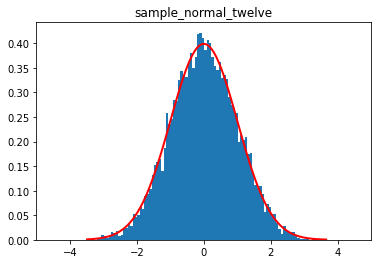

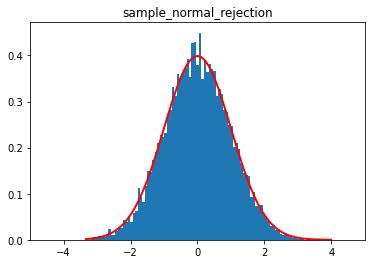

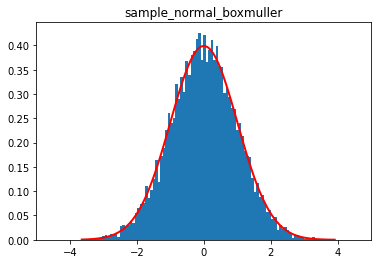

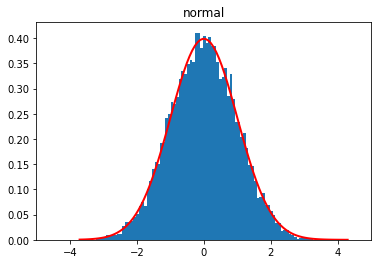

In [115]:
if __name__ == "__main__": main()